In [3]:
# Импорт нужных библиотек, matplotlib.pyplot используется для более удобного и наглядного вывода.
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random


In [4]:
def read_im(ref):
    """
    The function imports the image(Grayscale).
    """
    
    image = cv2.imread(ref, cv2.IMREAD_GRAYSCALE)
    
    return image

def read_imRGB(ref):
    """
    The function imports the image(RGB).
    """
    
    image = cv2.imread(ref)
    
    return image


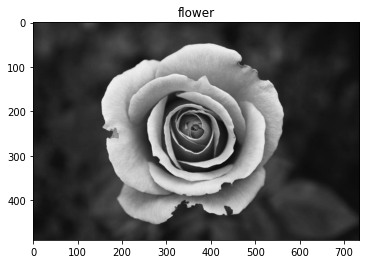

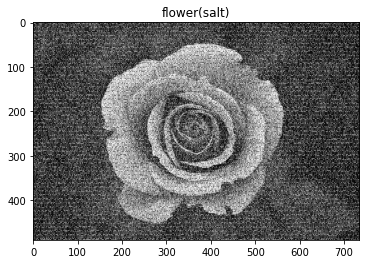

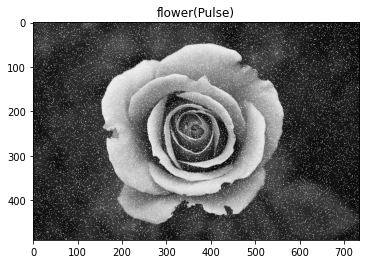

In [9]:
# Наложение шума на Grayscale изображения.
def Salt_and_Pepper(image):
    """
    The function imposes noise(Salt and Pepper) on the image(Grayscale).
    """
    
    noisy_s = np.copy(image)
    
    for i in range (0, image.shape[0], 3):
        for j in range (0, image.shape[1]):
                noisy_s[i][j] = random.choice([0, 255])


    return noisy_s


def Pulse_Noisy(image):
    """
    The function imposes noise(Pulse) on the image(Grayscale).
    """
    
    border = 0.05
    noisy_p = np.copy(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            
            if border >= random.random():
                noisy_p[i, j] = 255
    
    
    return noisy_p

plt.imshow(flower, cmap = 'gray')
plt.title('flower')
plt.show()

noisy_Salt = Salt_and_Pepper(flower)
noisy_Pulse = Pulse_Noisy(flower)

plt.imshow(noisy_Salt, cmap = 'gray')
plt.title('flower(salt)')
plt.show()

plt.imshow(noisy_Pulse, cmap = 'gray')
plt.title('flower(Pulse)')
plt.show()

In [16]:
# Функции для работы с Grayscale изображениями
def extend(image, size):
    """
    The function expands the image(Grayscale).
    """
    
    ex_image = np.pad(image, (size//2, size//2), mode='constant')
    
    return ex_image




def median_filt(image, filt_size):
    """
    The function filters the image(Grayscale) from noise(Salt and Pepper).
    """
    image_ext = extend(image, filt_size) 
    median_image = np.zeros(image.shape, dtype = 'uint8')
    
    for i in range (0, image.shape[0]-filt_size):
        for j in range (0, image.shape[1]-filt_size):
            
            filt_med = image_ext[i: i+filt_size, j: j+filt_size]
            filt_med = sorted(filt_med.flatten())
            median_image[i][j] = filt_med[len(filt_med)//2]
            
    return median_image




def sharp_filt(image, size):
    """
    The function increases the sharpness of the image(Gray Scale).
    """
    
    if size == 3:
        sharp_matr = 1/10 * np.array([[-1, -2, -1], [-2, 22, -2], [-1, -2, -1]])
    else:
        sharp_matr = np.array([[-1]*size]*size)
        sharp_matr[size//2][size//2] = size*size
        
    image_ext = extend(image, size) 
    image_sharp = np.zeros(image.shape, dtype = 'uint8')
    
    for i in range (0, image.shape[0]-size):
        for j in range (0, image.shape[1]-size):
            
            filt_sharp = image_ext[i: i+size, j: j+size]
            image_sharp[i][j] = np.sum(np.multiply(filt_sharp, sharp_matr))
        
    return image_sharp


def blur_filt(image, filt_size):
    """
    The function blurs the image(Gray Scale).
    """
    
    image_ext = extend(image, filt_size) 
    blur_image = np.zeros(image.shape, dtype = 'uint8')
    blur_matr = 1/np.power(filt_size, 2) * np.full([filt_size, filt_size], 1)
    
    for i in range (0, image.shape[0]-filt_size):
        for j in range (0, image.shape[1]-filt_size):
            
            filt_blur = image_ext[i: i+filt_size, j: j+filt_size]
            blur_image[i][j] = np.sum(np.multiply(filt_blur, blur_matr))
            
    return blur_image
    

Enter size of median filter (if you want 3x3, enter 3): 3
Enter size of sharp filter (if you want beautiful image, enter 3): 3
Enter size of blur filter (if you want 3x3, enter 3): 9


Text(0.5, 1.0, 'Flower(blur filter)')

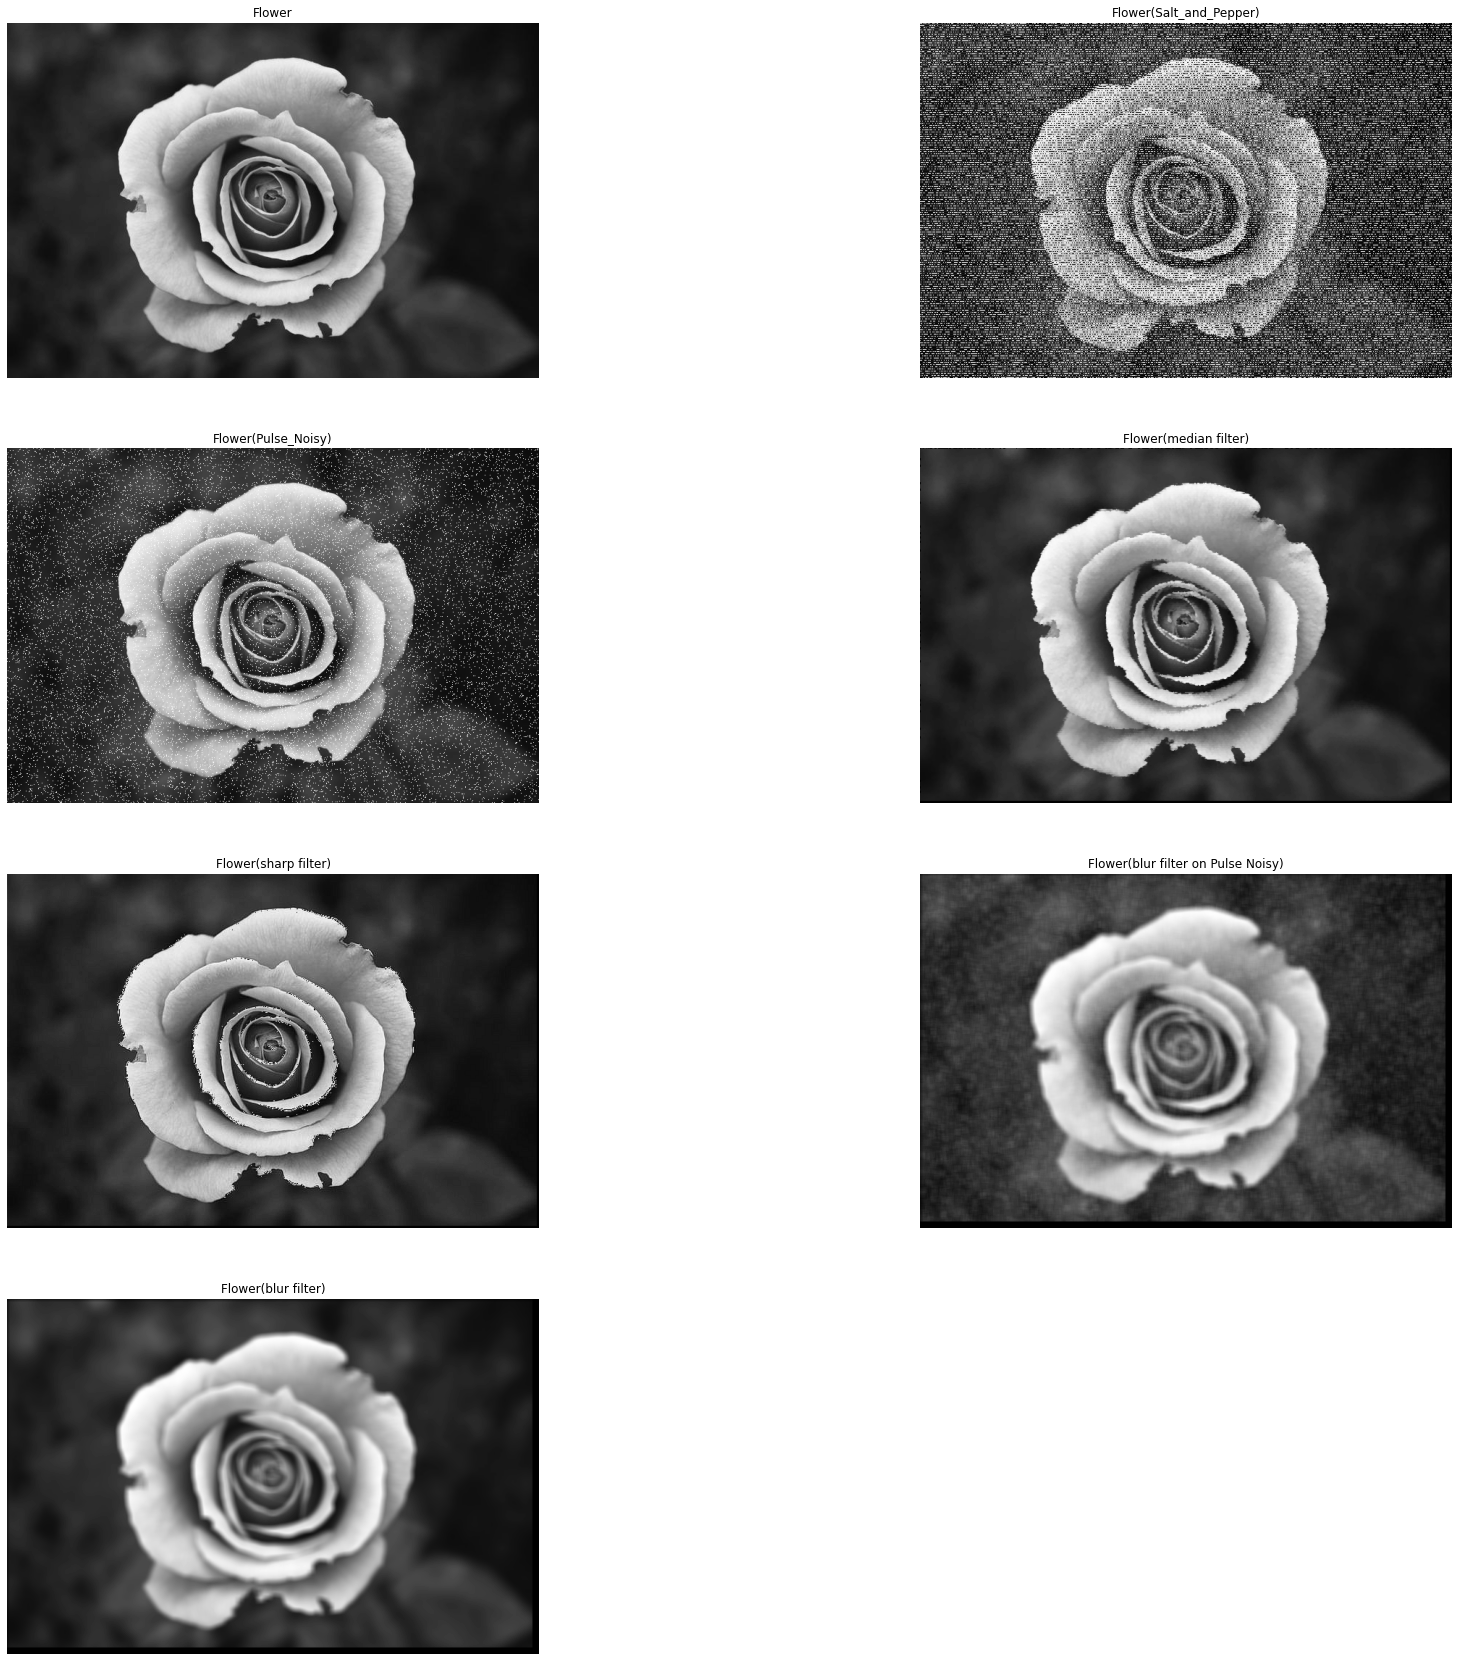

In [39]:
#Work with Gray Scale image.

flower = read_im("flower.jpg")

fig = plt.figure(figsize=(30, 30))
  

rows = 4
columns = 2
  

fig.add_subplot(rows, columns, 1)
  

plt.imshow(flower, cmap = 'gray')
plt.axis('off')
plt.title("Flower")
  

fig.add_subplot(rows, columns, 2)
  
#Salt and Pepper noisy
plt.imshow(noisy_Salt, cmap = 'gray')
plt.axis('off')
plt.title("Flower(Salt_and_Pepper)")
  

fig.add_subplot(rows, columns, 3)
  
#Pulse noisy
plt.imshow(noisy_Pulse, cmap = 'gray')
plt.axis('off')
plt.title("Flower(Pulse_Noisy)")
  

fig.add_subplot(rows, columns, 4)
  
size_med = int(input("Enter size of median filter (if you want 3x3, enter 3): "))

plt.imshow(median_filt(noisy_Salt, size_med), cmap = 'gray')
plt.axis('off')
plt.title("Flower(median filter)")


fig.add_subplot(rows, columns, 5)

size_sharp = int(input("Enter size of sharp filter (if you want beautiful image, enter 3): "))

plt.imshow(sharp_filt(flower, size_sharp), cmap = 'gray')
plt.axis('off')
plt.title("Flower(sharp filter)")


fig.add_subplot(rows, columns, 6)
  
size_blur = int(input("Enter size of blur filter (if you want 3x3, enter 3): "))

plt.imshow(blur_filt(noisy_Pulse, size_blur), cmap = 'gray')
plt.axis('off')
plt.title("Flower(blur filter on Pulse Noisy)")

fig.add_subplot(rows, columns, 7)
  

plt.imshow(blur_filt(flower, size_blur), cmap = 'gray')
plt.axis('off')
plt.title("Flower(blur filter)")

In [21]:
# Функции для добавления шумов в RGB изображения.
def Salt_and_PepperRGB(image):
    """
    The function imposes noise(Salt_and_Pepper) on the image(RGB).
    """
    cat_s = np.copy(cat)
    
    for i in range (0, cat.shape[0], 3):
        for j in range (0, cat.shape[1]):
            for k in range (0, cat.shape[2]):
                cat_s[i][j][k] = random.choice([0, 255])
                
    return cat_s

def PulseRGB(image):
    """
    The function imposes noise(Pulse) on the image(RGB).
    """
    
    cat_p = np.copy(cat)
    
    border = 0.03
    for i in range (0, cat.shape[0], 3):
        for j in range (0, cat.shape[1]):
            for k in range (0, cat.shape[2]):
                if border >= random.random():
                    cat_p[i][j][k] = 255
    return cat_p

In [37]:
# Функции для работы с RGB изображениями
def extendRGB(image, size):
    """
    The function expands the image(RGB).
    """
    
    ex_image = np.pad(image, (size//2, size//2), mode='constant')
    
    return ex_image




def median_filtRGB(image, filt_size):
    """
    The function filters the image(RGB) from noise(Salt and Pepper).
    """
    image_ext = extend(image, filt_size) 
    median_image = np.zeros(image.shape, dtype = 'uint8')
    
    for i in range (0, image.shape[0]-filt_size):
        for j in range (0, image.shape[1]-filt_size):
            for k in range(0, 3):
            
                filt_med = image_ext[i: i+filt_size, j: j+filt_size, k+1]
                filt_med = sorted(filt_med.flatten())
                median_image[i][j][k] = filt_med[len(filt_med)//2]
            
    return median_image




def sharp_filtRGB(image, size):
    """
    The function increases the sharpness of the image(RGB).
    """
    
    if size == 3:
        sharp_matr = 1/10 * np.array([[-1, -2, -1], [-2, 22, -2], [-1, -2, -1]])
    else:
        sharp_matr = np.array([[-1]*size]*size)
        sharp_matr[size//2][size//2] = size*size
        
    image_ext = extend(image, size) 
    image_sharp = np.zeros(image.shape, dtype = 'uint8')
    
    for i in range (0, image.shape[0]-size):
        for j in range (0, image.shape[1]-size):
            for k in range(0, 3):
            
                filt_sharp = image_ext[i: i+size, j: j+size, k+1]
                image_sharp[i][j][k] = np.sum(filt_sharp * sharp_matr)
        
    return image_sharp


def blur_filtRGB(image, filt_size):
    """
    The function blurs the image(RGB).
    """
    
    #image_ext = extend(image, filt_size) 
    blur_image = np.zeros(image.shape, dtype = 'uint8')
    blur_matr = 1/np.power(filt_size, 2) * np.full([filt_size, filt_size], 1)
    
    for i in range (0, image.shape[0]-filt_size):
        for j in range (0, image.shape[1]-filt_size):
            for k in range(0, 3):
            
                filt_blur = image[i: i+filt_size, j: j+filt_size, k]
                blur_image[i][j][k] = np.sum(filt_blur * blur_matr)
            
    return blur_image

Enter size of median filter (if you want 3x3, enter 3): 3
Enter size of sharp filter (if you want beautiful image, enter 3): 3
Enter size of blur filter (if you want 3x3, enter 3): 5


Text(0.5, 1.0, 'Cat(blur filter)')

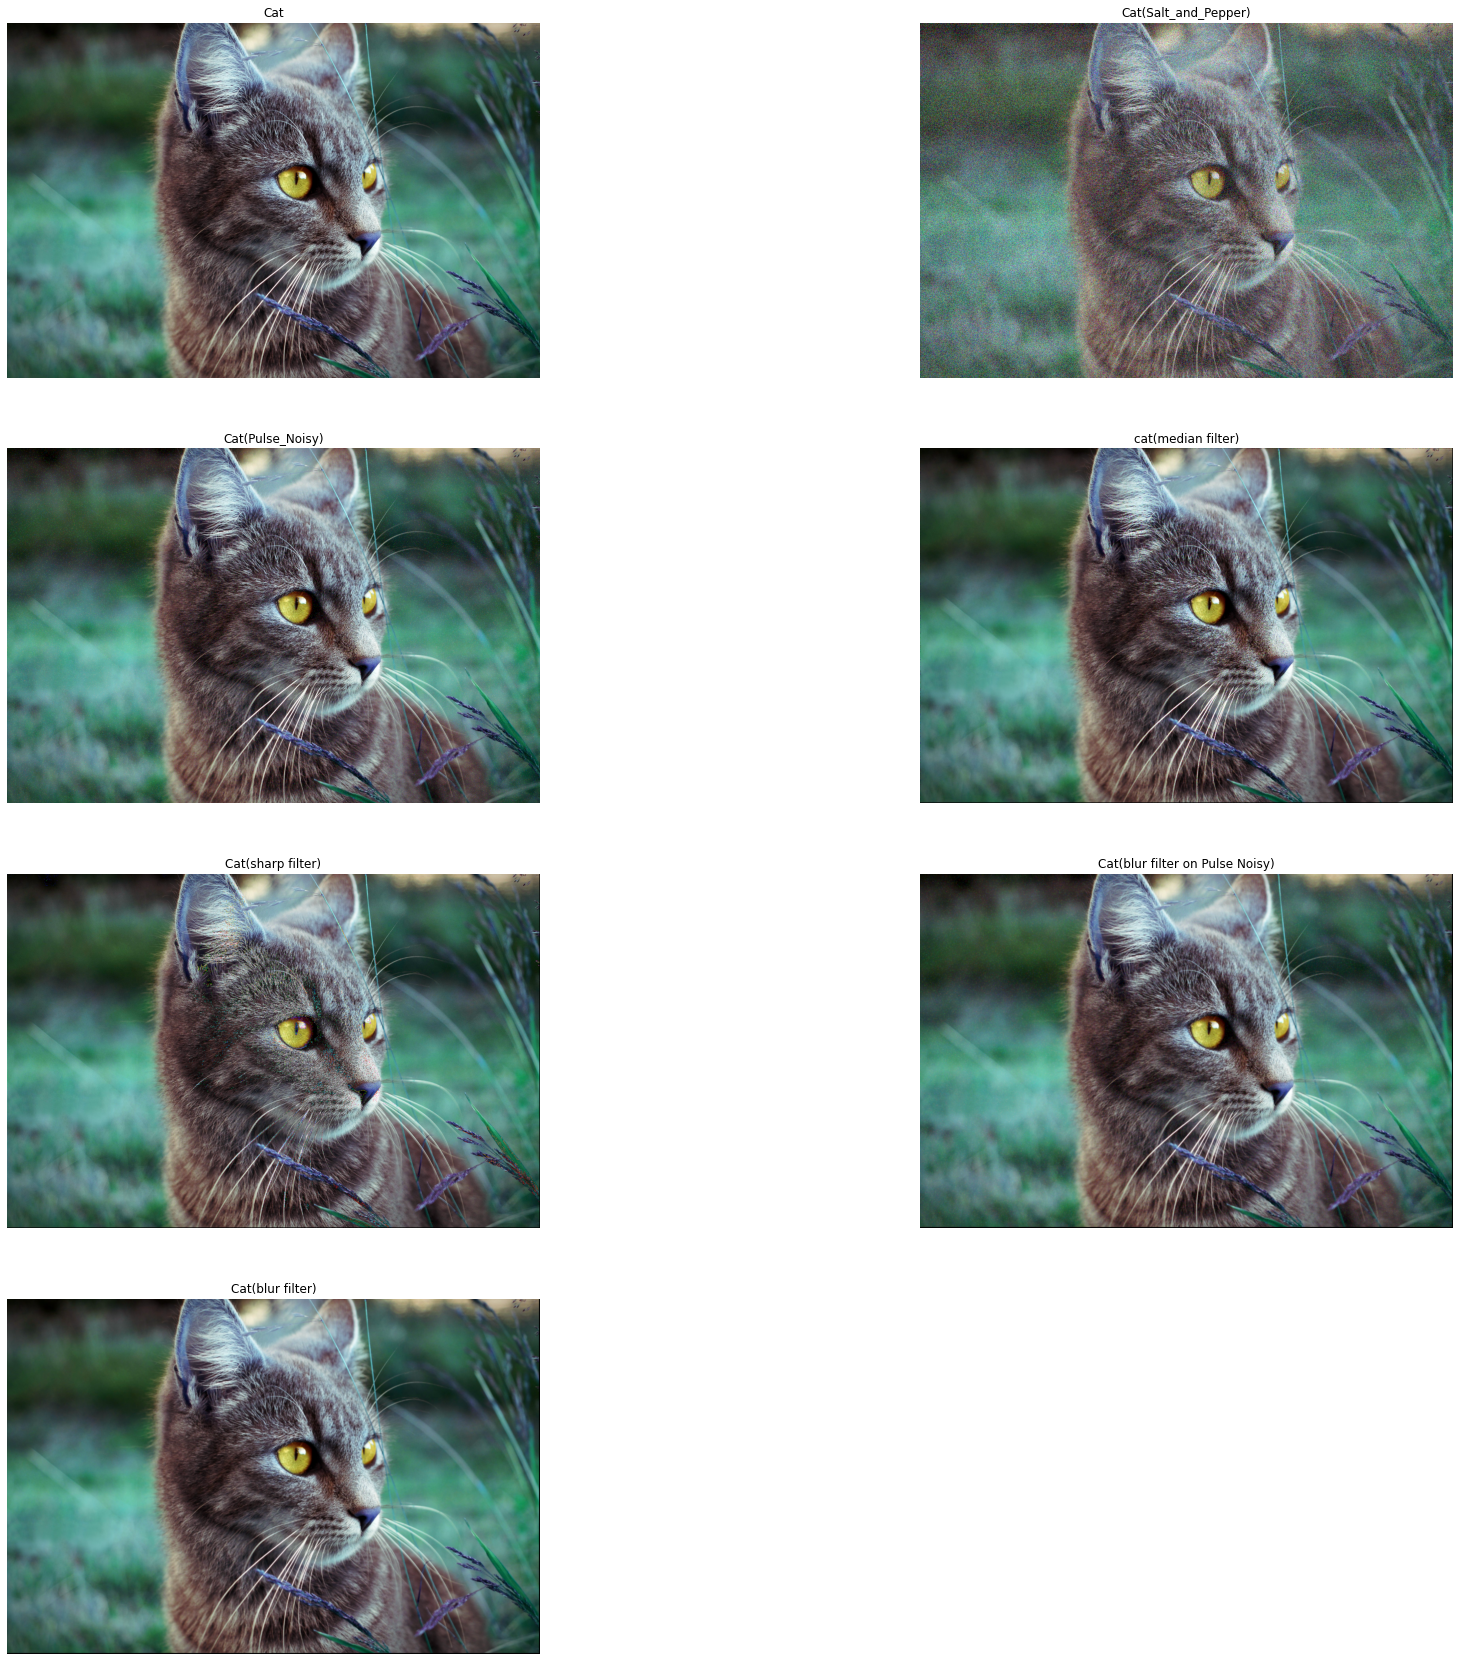

In [38]:
#Work with RGB image.
cat = read_imRGB("imagecat.jpg")
noisy_cat_s = Salt_and_PepperRGB(cat)
noisy_cat_p = PulseRGB(cat)

fig = plt.figure(figsize=(30, 30))
  

rows = 4
columns = 2
  

fig.add_subplot(rows, columns, 1)
  

plt.imshow(cat)
plt.axis('off')
plt.title("Cat")
  

fig.add_subplot(rows, columns, 2)
  
#Salt and Pepper noisy
plt.imshow(noisy_cat_s)
plt.axis('off')
plt.title("Cat(Salt_and_Pepper)")
  

fig.add_subplot(rows, columns, 3)
  
#Pulse noisy
plt.imshow(noisy_cat_p)
plt.axis('off')
plt.title("Cat(Pulse_Noisy)")
  

fig.add_subplot(rows, columns, 4)
  
size_med_cat = int(input("Enter size of median filter (if you want 3x3, enter 3): "))

plt.imshow(median_filtRGB(noisy_cat_s, size_med_cat))
plt.axis('off')
plt.title("cat(median filter)")


fig.add_subplot(rows, columns, 5)
  
size_sharpRGB = int(input("Enter size of sharp filter (if you want beautiful image, enter 3): "))

plt.imshow(sharp_filtRGB(cat, size_sharpRGB))
plt.axis('off')
plt.title("Cat(sharp filter)")


fig.add_subplot(rows, columns, 6)
  
size_blur_cat = int(input("Enter size of blur filter (if you want 3x3, enter 3): "))

plt.imshow(blur_filtRGB(noisy_cat_p, size_blur_cat))
plt.axis('off')
plt.title("Cat(blur filter on Pulse Noisy)")

fig.add_subplot(rows, columns, 7)
  

plt.imshow(blur_filtRGB(cat, size_blur_cat))
plt.axis('off')
plt.title("Cat(blur filter)")